# Initialise 

In [8]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

In [9]:
# %load_ext autoreload
# %autoreload 2
import c14
from c14 import livermodels as lm



In [10]:
data = pd.read_csv('../../../results/C14data_liver_samples_20190722.csv')
c14_patient_data = data.groupby(['type', 'sample', 'ploidy', 'pathology']).mean().dropna(how='all').reset_index()
c14_patient_data['age'] = c14_patient_data.Dcoll - c14_patient_data.Dbirth 
# c14_patient_data['e14C'] = c14_patient_data.error_measurement
data = c14_patient_data.query('type == "hepatocyte" and pathology != "Y"')
edata = c14.exp_data(data)

In [11]:
m  = lm.Pl40()

In [12]:
op = c14.optimize(model=m,data=edata,step_size=2)
vis= c14.visualisze(model=m,data=edata)
warnings.filterwarnings("ignore")

In [13]:
res = op.optimize_minuit_multistart(n=5,processes=8)

[(-6.0, 2.0)]


In [14]:
res

Pl40,p0,fval,values,errors,corr,cov,valid,n
3,{'lambda2': -1.2107321264237072},-82.984493,{'lambda2': -0.5344332330021897},{'lambda2': 0.051020083867478305},lambda2 lambda2 1.0,lambda2 lambda2 0.002603,True,33
2,{'lambda2': -0.14404846550875927},-82.984493,{'lambda2': -0.534399905534984},{'lambda2': 0.05102742181106796},lambda2 lambda2 1.0,lambda2 lambda2 0.002604,True,33


In [15]:
pe = res.sort_values('fval').iloc[1]['values']
cov = res.sort_values('fval').iloc[1]['cov']

In [16]:
errors = vis.calc_error(pe,cov)

In [17]:
pe

{'lambda2': -0.534399905534984}

In [18]:
len(errors[1]['delta2'][1])

200

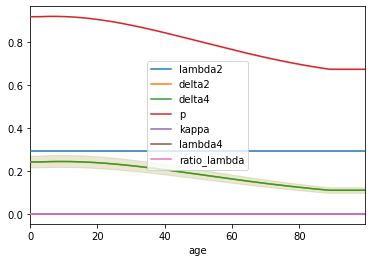

In [19]:
vis.plot_parameter(pe,errors,log=False)
plt.legend()
plt.show()

In [13]:
op.calc_aicc(pe)

-178.41572400186644